In [ ]:
import os
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

%matplotlib inline

In [ ]:
warnings.filterwarnings('ignore')

## Reading and processing dataset

In [ ]:
train_file = 'Network_Anamoly_Data_Train.txt'
test_file = 'Network_Anamoly_Data_Test.txt'

In [ ]:
head_names = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent",
              "hot","num_failed_logins","logged_in", "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations",
              "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login", "count", "srv_count",
              "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate",
              "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate",
              "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
              "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "attack", "last_flag"
              ]

In [ ]:
pd.read_csv(train_file, names= head_names)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


### Type Features:

In [ ]:
col_names = np.array(head_names)

nominal_idx = [1, 2, 3]
binary_idx = [6, 11, 13, 14, 20, 21]
numeric_idx = list(set(range(41)).difference(nominal_idx).difference(binary_idx))

In [ ]:
nominal_cols = col_names[nominal_idx].tolist()
binary_cols = col_names[binary_idx].tolist()
numeric_cols = col_names[numeric_idx].tolist()

In [ ]:
print('> nominal columns\n\n', nominal_cols, '\n')
print('>> binary columns\n\n', binary_cols, '\n' )
print('>>> numeric columns\n\n', numeric_cols)

> nominal columns

 ['protocol_type', 'service', 'flag'] 

>> binary columns

 ['land', 'logged_in', 'root_shell', 'su_attempted', 'is_host_login', 'is_guest_login'] 

>>> numeric columns

 ['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


In [ ]:
category = defaultdict(list)
category['benign'].append('normal')

with open('Sub_Attack_Types.txt', 'r') as f:
    for line in f.readlines():
        attack, cat = line.strip().split(' ')
        category[cat].append(attack)

attack_mapping = dict((v,k) for k in category for v in category[k])

In [ ]:
train_df =  pd.read_csv(train_file, names= head_names)
train_df['attack_category'] = train_df['attack'] \
                                .map(lambda x: attack_mapping[x])
train_df.drop(['last_flag'], axis= 1, inplace= True)

test_df =  pd.read_csv(test_file, names= head_names)
test_df['attack_category'] = test_df['attack'] \
                                .map(lambda x: attack_mapping[x])
test_df.drop(['last_flag'], axis= 1, inplace= True)

In [ ]:
# extract the number of attack for each type (Train)
train_attack_types = train_df['attack'].value_counts()

# extract the number attack for each category (Train)
train_attack_cats = train_df['attack_category'].value_counts()

In [ ]:
# extract the number of attack for each type (Test)
test_attack_types = test_df['attack'].value_counts()

# extract the number of attack for each category (Test)
test_attack_cats = test_df['attack_category'].value_counts()

<Axes: >

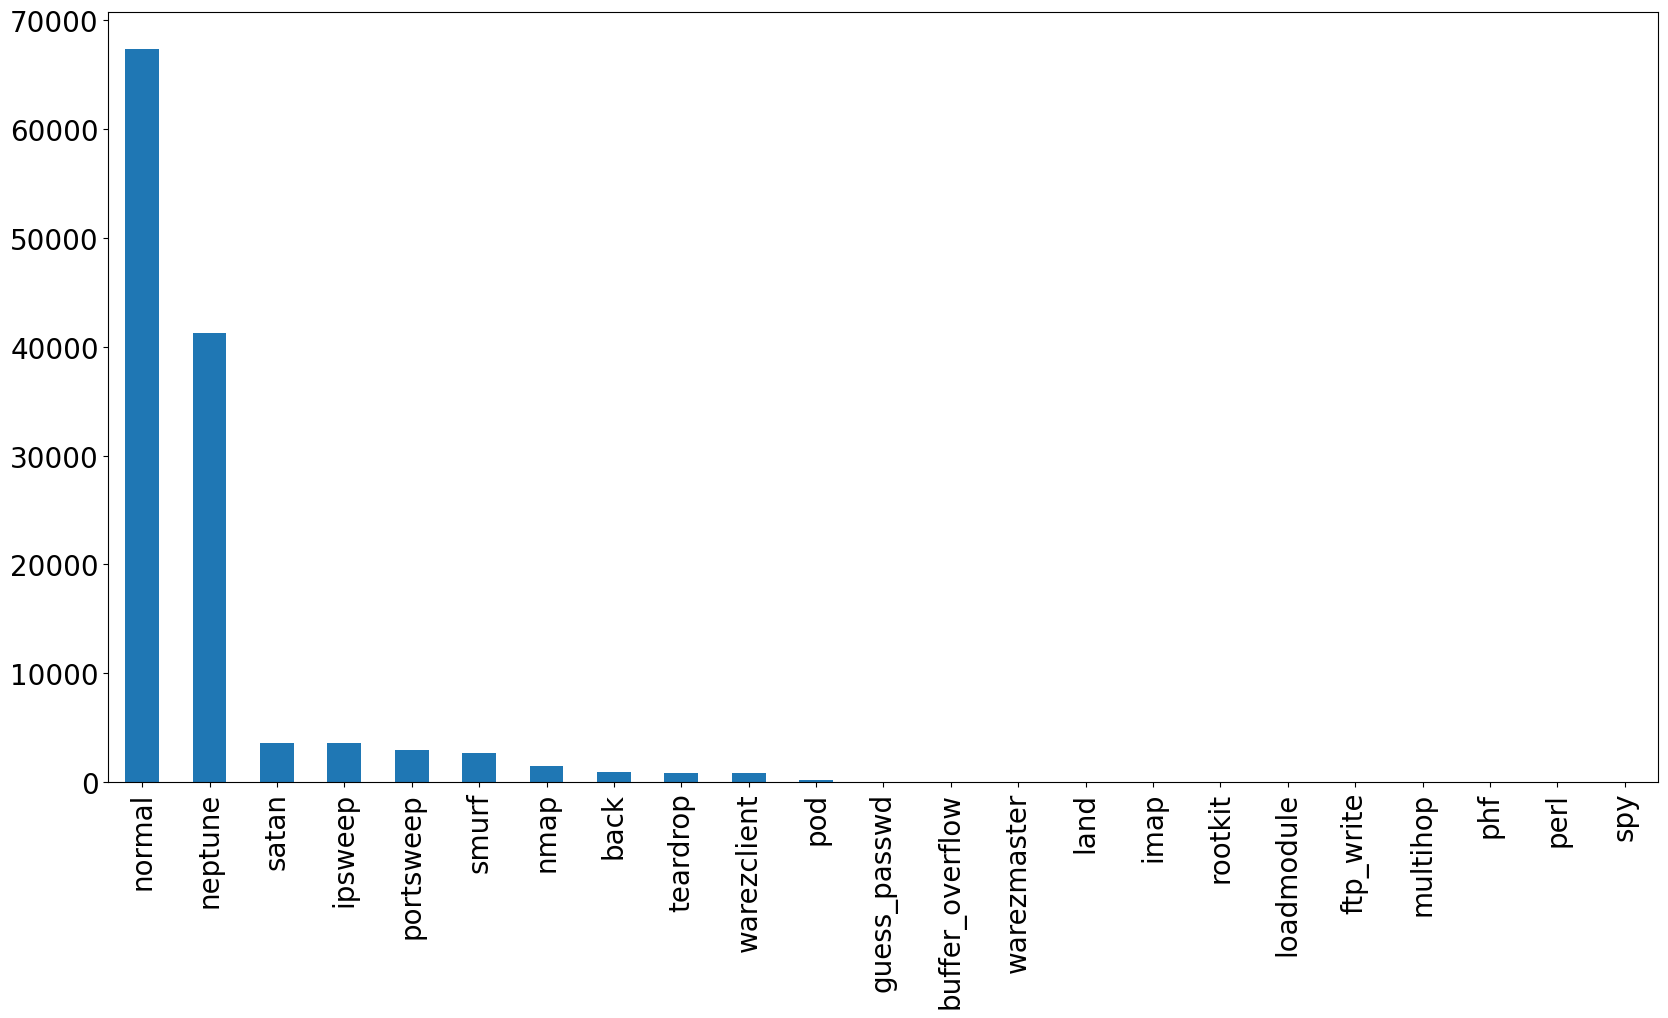

In [ ]:
# plot type of attacks
train_attack_types.plot(kind= 'bar', figsize= (20, 10), fontsize= 20)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'benign'),
  Text(1, 0, 'dos'),
  Text(2, 0, 'probing'),
  Text(3, 0, 'r2l'),
  Text(4, 0, 'u2r')])

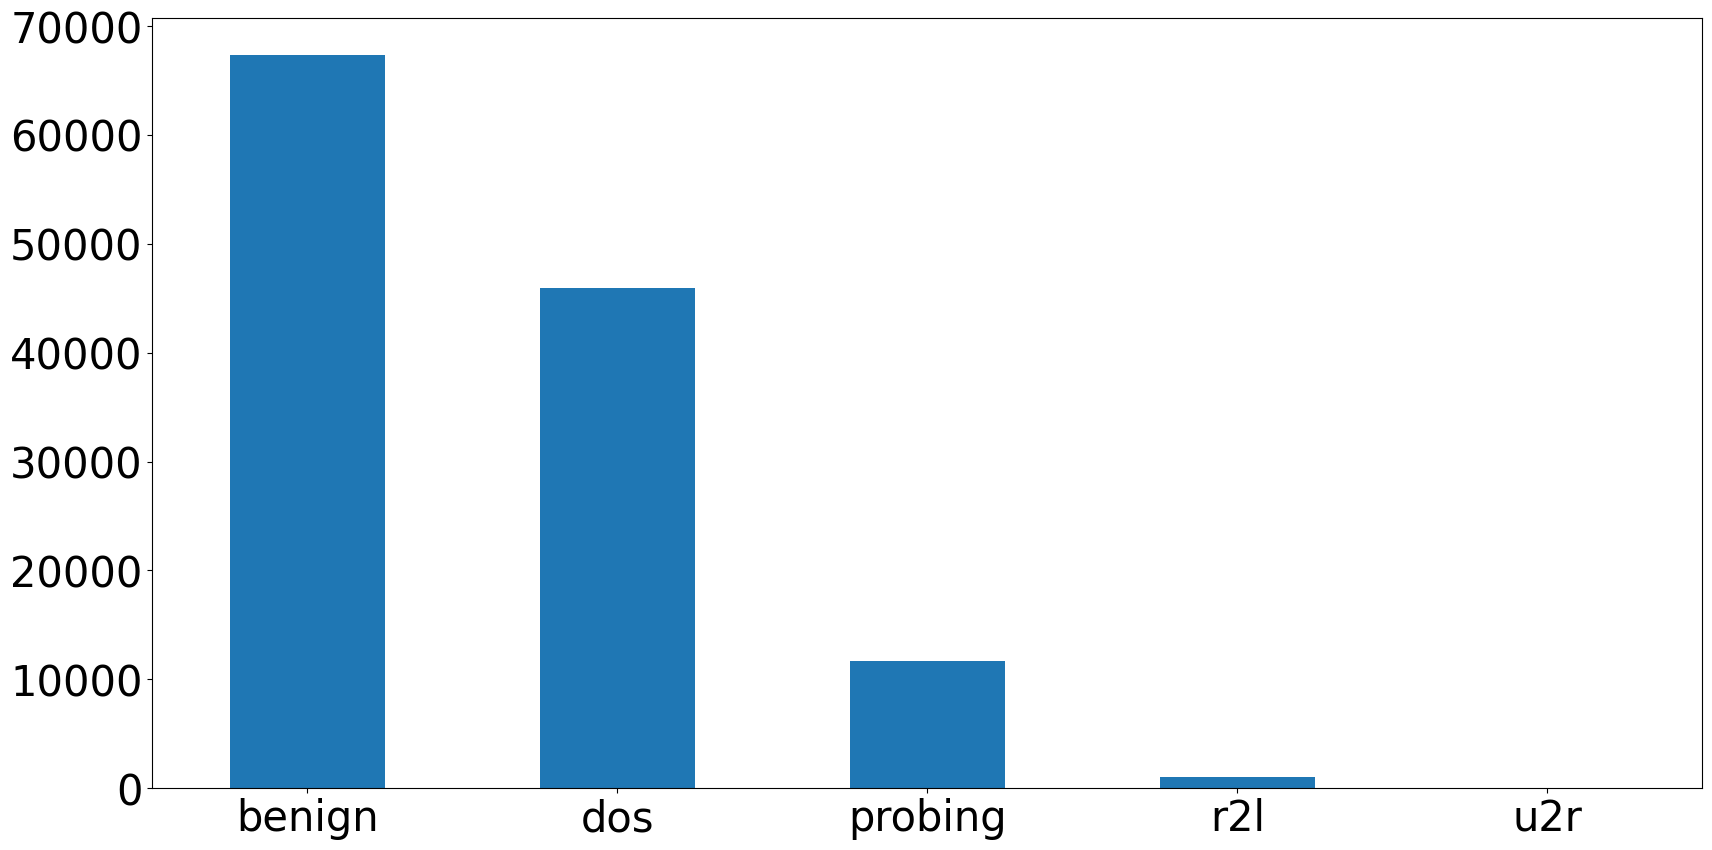

In [ ]:
# plot category of attacks
train_attack_cats.plot(kind= 'bar', figsize=(20, 10), fontsize= 30)
plt.xticks(rotation = 360)

<Axes: >

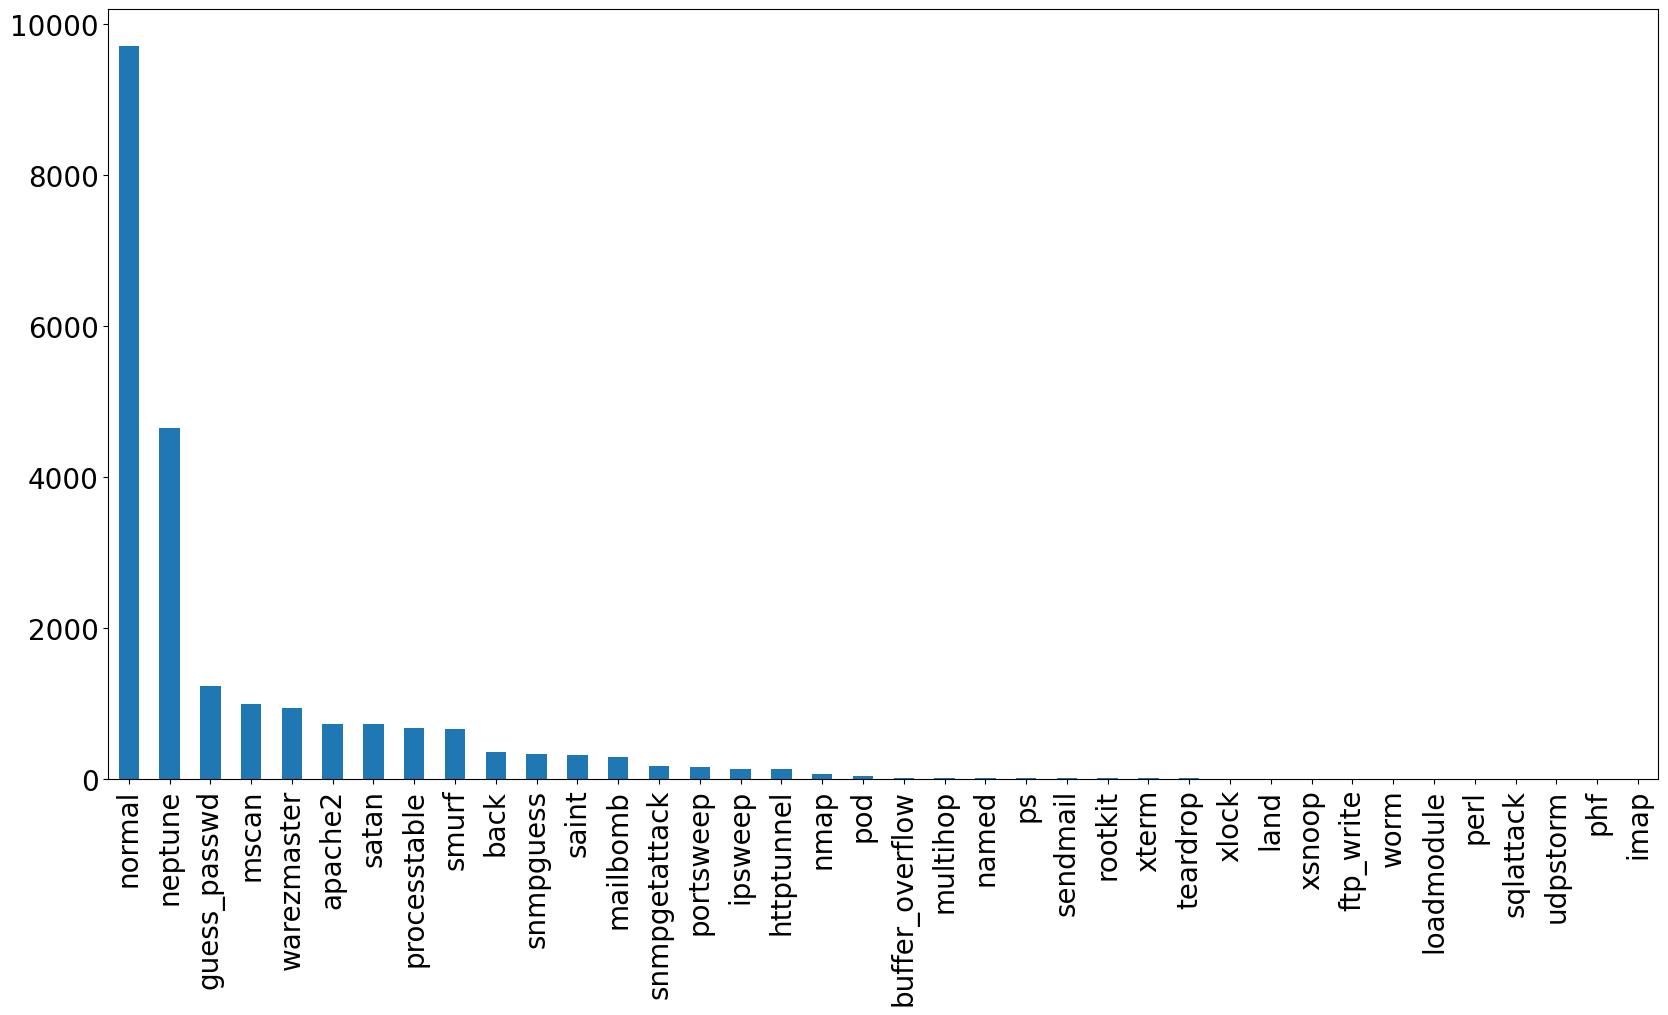

In [ ]:
# plot type of attacks
test_attack_types.plot(kind= 'bar', figsize= (20, 10), fontsize= 20)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'benign'),
  Text(1, 0, 'dos'),
  Text(2, 0, 'r2l'),
  Text(3, 0, 'probing'),
  Text(4, 0, 'u2r')])

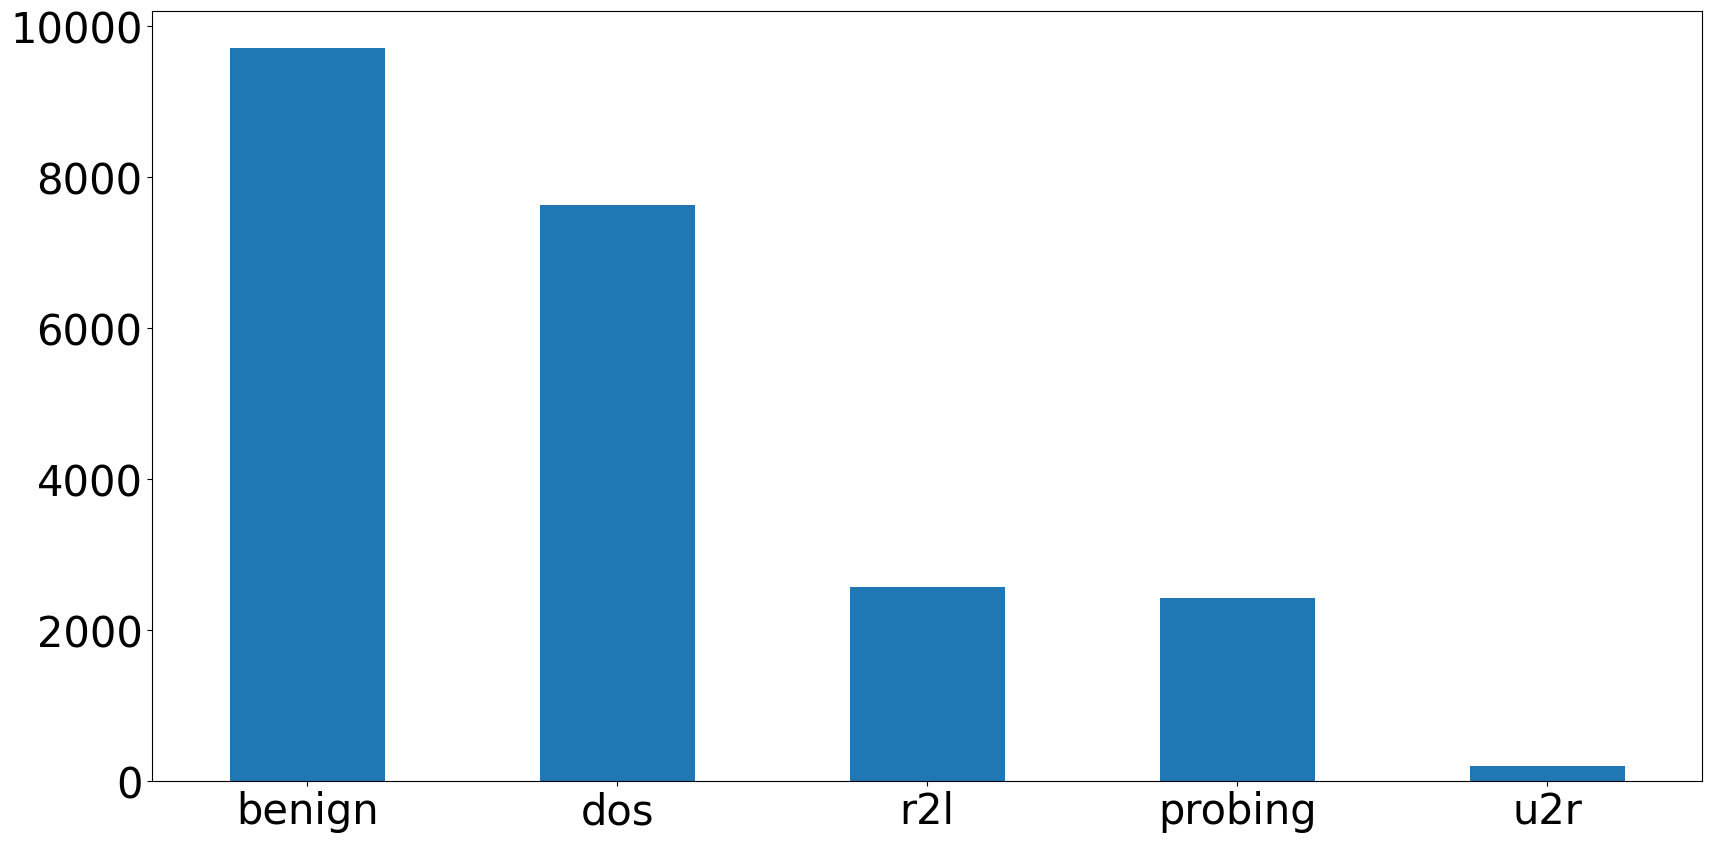

In [ ]:
# plot category of attacks
test_attack_cats.plot(kind= 'bar', figsize=(20, 10), fontsize= 30)
plt.xticks(rotation = 360)

### we can notice there's some different values between train and test

## look at the binary features

In [ ]:
# By definition, all of these features should have a min of 0.0 and a max of 1.0
train_df[binary_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
land,125973.0,0.000198,0.014086,0.0,0.0,0.0,0.0,1.0
logged_in,125973.0,0.395736,0.489010,0.0,0.0,0.0,1.0,1.0
root_shell,125973.0,0.001342,0.036603,0.0,0.0,0.0,0.0,1.0
su_attempted,125973.0,0.001103,0.045154,0.0,0.0,0.0,0.0,2.0
is_host_login,125973.0,0.000008,0.002817,0.0,0.0,0.0,0.0,1.0
is_guest_login,125973.0,0.009423,0.096612,0.0,0.0,0.0,0.0,1.0


#### there's a problem with su_attempted column he has a 2.0 ?!

In [ ]:
# let's look at grouped of all values in the column (Train)
train_df.groupby(['su_attempted']).size()

su_attempted
0    125893
1        21
2        59
dtype: int64

In [ ]:
# let's look at grouped of all values in the column (Test)
test_df.groupby(['su_attempted']).size()

su_attempted
0    22540
1        2
2        2
dtype: int64

In [ ]:
# let's fix this discrepancy and assume that su_attempted = 2  ->> su_attempted= 0
train_df['su_attempted'].replace(2, 0, inplace= True)
test_df['su_attempted'].replace(2, 0, inplace= True)
train_df.groupby(['su_attempted']).size(), test_df.groupby(['su_attempted']).size()

(su_attempted
 0    125952
 1        21
 dtype: int64,
 su_attempted
 0    22542
 1        2
 dtype: int64)

## look at the numeric features

In [ ]:
# we notice that the num_outbound_cmds column only takes on one value!
train_df['num_outbound_cmds'].sum()

0

#### Now, that's not a very useful feature - let's drop it from the dataset

In [ ]:
train_df.drop('num_outbound_cmds', axis = 1, inplace=True)
test_df.drop('num_outbound_cmds', axis = 1, inplace=True)
numeric_cols.remove('num_outbound_cmds')

# Data Preparation

In [ ]:
# set attack cats to separate variable (train dataset)
# set all data set as a raw without attack cats and attack type
train_y = train_df['attack_category']
train_x_row= train_df.drop(['attack_category', 'attack'], axis= 1)

In [ ]:
# set attack cats to separate variable (test dataset)
# set all data set as a raw without attack cats and attack type
test_y = test_df['attack_category']
test_x_raw = test_df.drop(['attack_category', 'attack'], axis= 1)

In [ ]:
# combine two of raw data then get dummies from them to be all a numeric values
# set columns to be nominal we won't them be a messy :(
comb_df_raw = pd.concat([train_x_row, test_x_raw])
comb_df = pd.get_dummies(comb_df_raw, columns= nominal_cols, drop_first= True)

# separate two aspects dataset after we convert it
train_x= comb_df[:len(train_x_row)]
test_x= comb_df[len(train_x_row):]

# Store dummy variable feature names
dummy_vars = list(set(train_x) - set(comb_df_raw))

In [ ]:
dummy_vars

['service_ftp',
 'flag_S0',
 'service_ecr_i',
 'service_csnet_ns',
 'service_ntp_u',
 'service_tftp_u',
 'service_red_i',
 'service_private',
 'flag_RSTR',
 'service_remote_job',
 'service_hostnames',
 'service_exec',
 'flag_S1',
 'service_ctf',
 'service_pop_3',
 'service_http',
 'service_http_2784',
 'service_domain_u',
 'service_rje',
 'service_discard',
 'service_pop_2',
 'service_X11',
 'service_other',
 'service_uucp',
 'service_eco_i',
 'service_pm_dump',
 'service_kshell',
 'service_vmnet',
 'service_domain',
 'service_whois',
 'flag_S3',
 'service_netstat',
 'service_netbios_ssn',
 'service_link',
 'service_supdup',
 'service_name',
 'service_harvest',
 'flag_SH',
 'service_tim_i',
 'service_telnet',
 'flag_RSTO',
 'service_uucp_path',
 'service_sql_net',
 'service_echo',
 'service_http_443',
 'service_sunrpc',
 'service_aol',
 'service_nnsp',
 'service_smtp',
 'service_nntp',
 'protocol_type_tcp',
 'service_shell',
 'flag_RSTOS0',
 'service_efs',
 'service_finger',
 'service_

In [ ]:
train_x.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.00000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,0.08917,0.012399,0.000818,0.019218,0.276655,0.002897,0.001008,0.000389,0.594929,0.002151
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,0.28499,0.110661,0.028583,0.137292,0.447346,0.053750,0.031736,0.019719,0.490908,0.046332
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Example statistics for the 'duration' feature before scaling
train_x['duration'].describe()

count    125973.00000
mean        287.14465
std        2604.51531
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max       42908.00000
Name: duration, dtype: float64

In [ ]:
# Experimenting with StandardScaler on the single 'duration' feature
from sklearn.preprocessing import StandardScaler

durations = train_x['duration'].values.reshape(-1, 1)
standard_scaled_dur = StandardScaler().fit_transform(durations)
pd.Series(standard_scaled_dur.flatten()).describe()

count    1.259730e+05
mean     2.549477e-17
std      1.000004e+00
min     -1.102492e-01
25%     -1.102492e-01
50%     -1.102492e-01
75%     -1.102492e-01
max      1.636428e+01
dtype: float64

In [ ]:
# Experimenting with MinMaxScaler on the single 'duration' feature
from sklearn.preprocessing import MinMaxScaler

min_max_scaled_dur = MinMaxScaler().fit_transform(durations)
pd.Series(min_max_scaled_dur.flatten()).describe()

count    125973.000000
mean          0.006692
std           0.060700
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
dtype: float64

In [ ]:
# Experimenting with RobustScaler on the single 'duration' feature
from sklearn.preprocessing import RobustScaler

robust_scaled_dur= RobustScaler().fit_transform(durations)
pd.Series(robust_scaled_dur.flatten()).describe()

count    125973.00000
mean        287.14465
std        2604.51531
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max       42908.00000
dtype: float64

In [ ]:
# Apply StandardScaler to all the numeric columns in train and test
standard_scaler = StandardScaler()

train_x[numeric_cols] = standard_scaler.fit_transform(train_x[numeric_cols])

test_x[numeric_cols] = standard_scaler.fit_transform(test_x[numeric_cols])

In [ ]:
train_x.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
count,1.259730e+05,1.259730e+05,1.259730e+05,125973.000000,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,125973.000000,1.259730e+05,...,125973.00000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,2.549477e-17,-4.512349e-19,7.614590e-19,0.000198,4.230328e-19,4.455945e-18,-2.244894e-17,2.989431e-18,0.395736,-6.549957e-18,...,0.08917,0.012399,0.000818,0.019218,0.276655,0.002897,0.001008,0.000389,0.594929,0.002151
std,1.000004e+00,1.000004e+00,1.000004e+00,0.014086,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,0.489010,1.000004e+00,...,0.28499,0.110661,0.028583,0.137292,0.447346,0.053750,0.031736,0.019719,0.490908,0.046332
min,-1.102492e-01,-7.762241e-03,-4.918644e-03,0.000000,-8.948642e-02,-7.735985e-03,-9.507567e-02,-2.702282e-02,0.000000,-1.166364e-02,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.102492e-01,-7.762241e-03,-4.918644e-03,0.000000,-8.948642e-02,-7.735985e-03,-9.507567e-02,-2.702282e-02,0.000000,-1.166364e-02,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.102492e-01,-7.754745e-03,-4.918644e-03,0.000000,-8.948642e-02,-7.735985e-03,-9.507567e-02,-2.702282e-02,0.000000,-1.166364e-02,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,-1.102492e-01,-7.715224e-03,-4.790326e-03,0.000000,-8.948642e-02,-7.735985e-03,-9.507567e-02,-2.702282e-02,1.000000,-1.166364e-02,...,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.636428e+01,2.350675e+02,3.257486e+02,1.000000,1.174348e+01,2.088191e+02,3.571955e+01,1.104972e+02,1.000000,3.123689e+02,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Extract benign sets from both train and test
train_y_bin = train_y.apply(lambda x: 0 if x is 'benign' else 1)
test_y_bin = test_y.apply(lambda x: 0 if x is 'benign' else 1)

In [ ]:
# import required modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

In [ ]:
# 5-class calssification version

classifier = DecisionTreeClassifier(random_state= 17)
classifier.fit(train_x, train_y)

pred_y = classifier.predict(test_x)

results = confusion_matrix(test_y, pred_y)
error = zero_one_loss(test_y, pred_y)

print(results)
print(error)

[[8318  213 1179    1    0]
 [1573 5383  680    0    0]
 [  95  831 1495    0    0]
 [1118  296 1115   47    0]
 [  25  107   68    0    0]]
0.32385557132718235


Big Error Rate !

In [ ]:
# Try with KNN

clf = KNeighborsClassifier(n_neighbors= 1, n_jobs= -1)
clf.fit(train_x, train_y)

pred_y = clf.predict(test_x)

results = confusion_matrix(test_y, pred_y)
error = zero_one_loss(test_y, pred_y)

print(results)
print(error)

[[9425   56  217   11    2]
 [1503 6069   61    3    0]
 [ 726  196 1498    1    0]
 [2219    2    8  323   24]
 [ 165    0   19    7    9]]
0.23154719659332856


In [ ]:
# Try with SVM
classifier = LinearSVC()
classifier.fit(train_x, train_y)

pred_y = classifier.predict(test_x)

results = confusion_matrix(test_y, pred_y)
error = zero_one_loss(test_y, pred_y)

print('result', results)
print('error', error)

result [[8958  134  606   11    2]
 [1692 5939    5    0    0]
 [ 738  241 1362   80    0]
 [2507    4    6   59    0]
 [ 172   17    0    3    8]]
error 0.27581618168914124


## Dealing with class imbalance

In [ ]:
test_y.value_counts().apply(lambda x: x/float(len(test_y)))

benign     0.430758
dos        0.338715
r2l        0.114265
probing    0.107390
u2r        0.008872
Name: attack_category, dtype: float64

In [ ]:
train_y.value_counts().apply(lambda x: x/float(len(train_y)))

benign     0.534583
dos        0.364578
probing    0.092528
r2l        0.007899
u2r        0.000413
Name: attack_category, dtype: float64

In [ ]:
print(pd.Series(train_y).value_counts())

benign     67343
dos        45927
probing    11656
r2l          995
u2r           52
Name: attack_category, dtype: int64


### we can notice whole data reduced

In [ ]:
# first apply over sampling
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='auto', random_state=0)
train_x_sm, train_y_sm = sm.fit_resample(train_x, train_y)
print(pd.Series(train_y_sm).value_counts())

benign     67343
dos        67343
r2l        67343
probing    67343
u2r        67343
Name: attack_category, dtype: int64


In [ ]:
# Now apply under sampling imbalence on over sampling
from imblearn.under_sampling import RandomUnderSampler

mean_class_size = int(pd.Series(train_y).value_counts().sum()/5)

ratio = {'benign': mean_class_size,
         'dos': mean_class_size,
         'probing': mean_class_size,
         'r2l': mean_class_size,
         'u2r': mean_class_size}
rus = RandomUnderSampler(sampling_strategy= ratio, random_state= 0, replacement= True)
train_x_rus, train_y_rus = rus.fit_resample(train_x_sm, train_y_sm)
print(pd.Series(train_y_rus).value_counts())

benign     25194
dos        25194
probing    25194
r2l        25194
u2r        25194
Name: attack_category, dtype: int64


This reduces Nicely!

## Remodling our classifier

In [ ]:
# Decision Tree
clf = DecisionTreeClassifier(random_state= 17)
clf.fit(train_x_rus, train_y_rus)

pred_y= clf.predict(test_x)

results = confusion_matrix(test_y, pred_y)
error = zero_one_loss(test_y, pred_y)

print('result', results)
print('error', error)

result [[7422   78 2048  145   18]
 [1380 1997 4254    0    5]
 [ 315  233 1827   44    2]
 [ 869    0 1351  348    8]
 [  29    0  161   10    0]]
error 0.4857168204400284


In [ ]:
# Trying with KNN

clf = KNeighborsClassifier(n_neighbors= 1, n_jobs= -1)
clf.fit(train_x_rus, train_y_rus)

pred_y = clf.predict(test_x)

results = confusion_matrix(test_y, pred_y)
error = zero_one_loss(test_y, pred_y)

print('result', results)
print('error', error)

result [[9374   57  245   24   11]
 [1495 6068   67    6    0]
 [ 703  194 1519    2    3]
 [1828    2   15  239  492]
 [  77    0   85   18   20]]
error 0.2361603974449965


In [ ]:
# Trying with SVM
classifier = LinearSVC()
classifier.fit(train_x_rus, train_y_rus)

pred_y = classifier.predict(test_x)

results = confusion_matrix(test_y, pred_y)
error = zero_one_loss(test_y, pred_y)

print('result', results)
print('error', error)

result [[8904  117  682    6    2]
 [1484 5989  163    0    0]
 [ 521  174 1705   21    0]
 [2487    5   12    6   66]
 [ 173   18    1    3    5]]
error 0.26326295244854503


# Attempting unsupervised learning

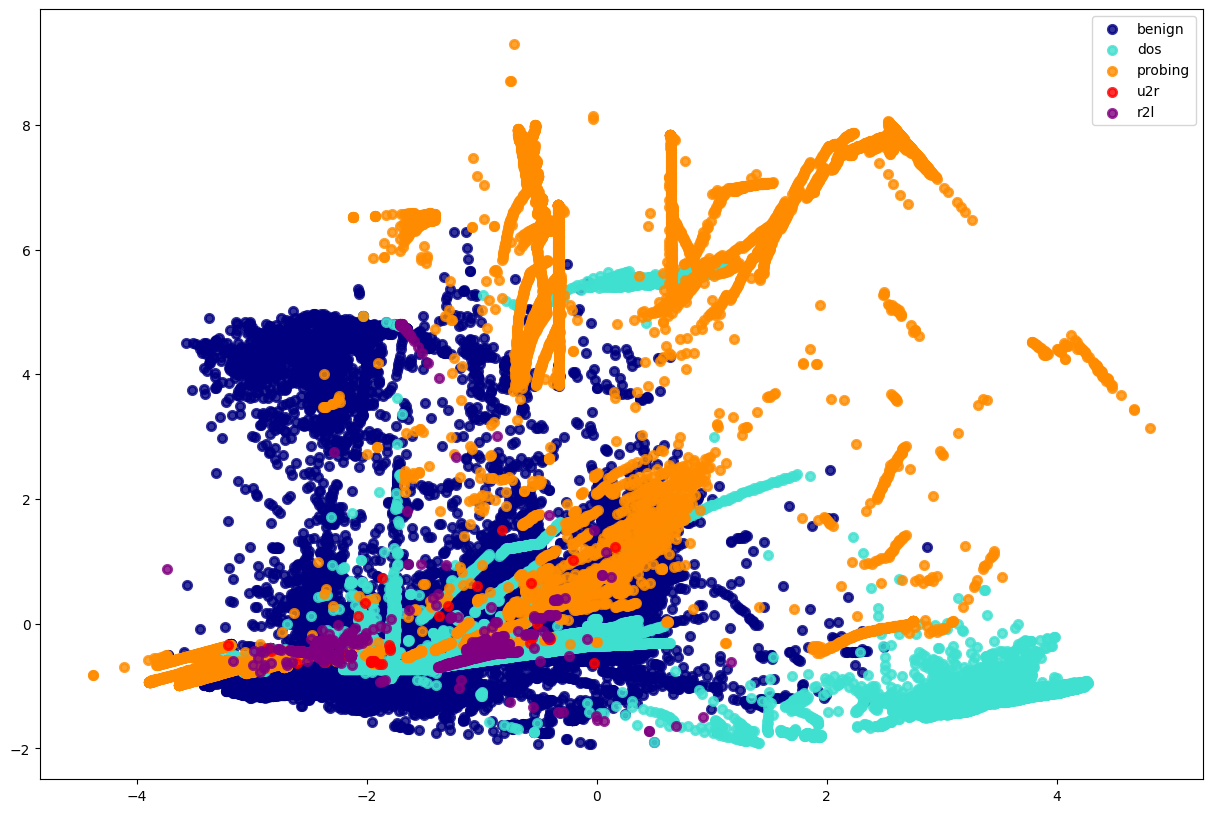

In [ ]:
# First, let's visualize the dataset(only numeric cols)

from sklearn.decomposition import PCA

# Use PCA to reduce dimensionality so we can visualize the dataset on a 2d plot
pca= PCA(n_components= 2)
train_x_pca_cont = pca.fit_transform(train_x[numeric_cols])

plt.figure(figsize= (15, 10))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'purple']

for color,cat in zip(colors, category.keys()):
    plt.scatter(train_x_pca_cont[train_y == cat, 0],
                train_x_pca_cont[train_y == cat, 1],
                color= color, alpha= 0.8, lw=2, label= cat)
plt.legend(loc= 'best', shadow= False, scatterpoints= 1)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5).fit(train_x)
pred_y = kmeans.predict(test_x)

print(pd.Series(pred_y).value_counts())

0    13783
1     4674
2     2393
3     1694
dtype: int64


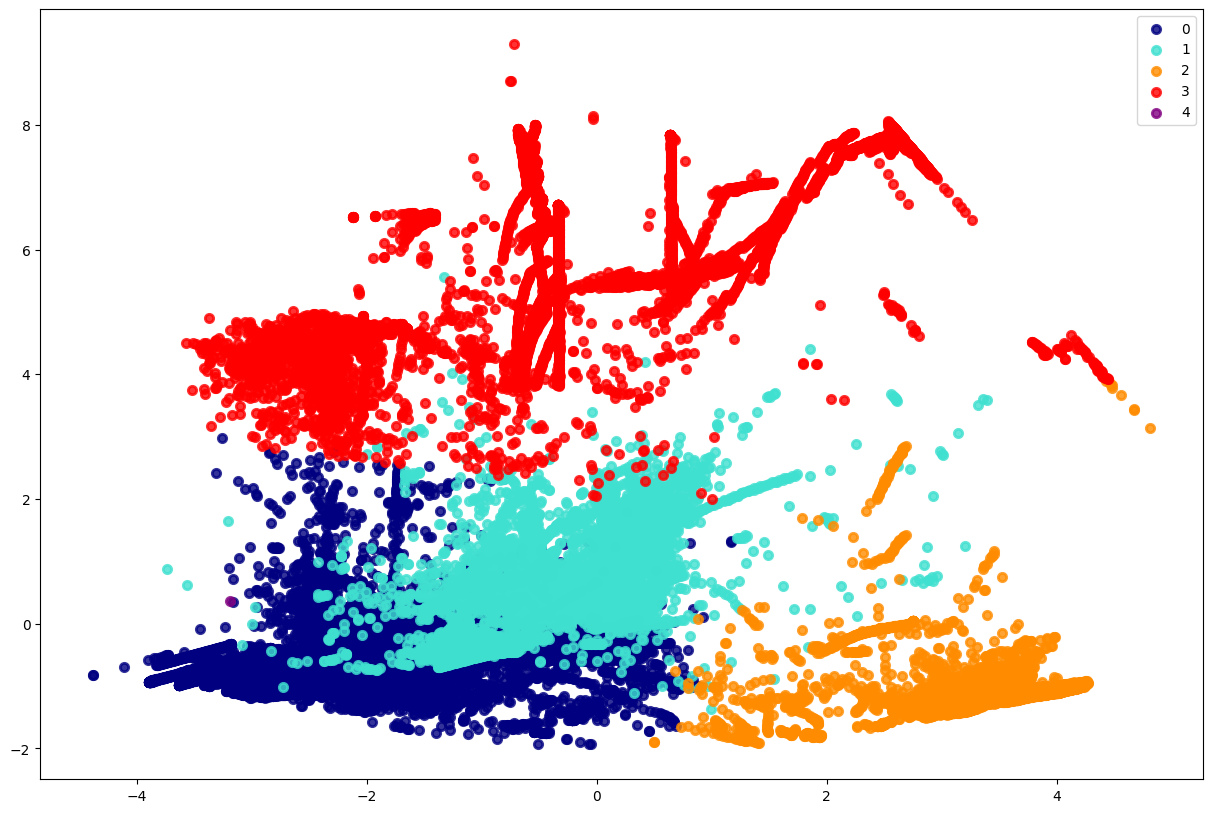

In [ ]:
# Apply k-means (k=5, only using numeric cols) + PCA + plot
from sklearn.cluster import KMeans
# Fit the training data to a k-means clustering estimator model
kmeans= KMeans(n_clusters= 5, random_state= 17)
kmeans.fit(train_x[numeric_cols])

# Retrieve the labels assigned to each training sample
kmeans_y = kmeans.labels_

# plot in 2d with train_pca_cont
plt.figure(figsize= (15, 10))
color = ['navy', 'turquoise', 'darkorange', 'red', 'purple']

for color, cat in zip(colors, range(5)):
    plt.scatter(train_x_pca_cont[kmeans_y == cat, 0],
                train_x_pca_cont[kmeans_y == cat, 1],
                color= color, alpha= .8, lw= 2, label= cat)
plt.legend(loc= 'best', shadow= False, scatterpoints= 1)
plt.show()

In [ ]:
# look at number of features
print('Total number of features : {}'.format(len(train_x.columns)))
# and number fo continuous features
print('Total number of continuous features: {}'.format(len(train_x[numeric_cols].columns)))

Total number of features : 118
Total number of continuous features: 31


### Evaluating
Evaluating results of clustering is not as
simple as just comparing expected and predicted labels.

#### Method
To evaluate our model, we compute how many benign samples are grouped into the
same cluster, and how many samples of other classes are grouped into that cluster

**Specifically**, we compute two metrics, the **completeness score** and the **homogeneity score**.

A cluster is **complete** (has completeness score 1) if all data points belonging to the same class (i.e., with the same class label) are clustered together.
On the other hand,
a cluster is **homogeneous** (has homogeneity score 1) if all data points that are clustered together belong to the same class.

The **V-measure**, defined to be the harmonic
mean of homogeneity and completeness, provides a convenient single metric
for evaluation:

In [ ]:
from sklearn.metrics import completeness_score, homogeneity_score, v_measure_score

print('Completeness: {}'.format(completeness_score(test_y, pred_y)))
print('Homogeneity: {}'.format(homogeneity_score(test_y, pred_y)))
print('V-measure: {}'.format(v_measure_score(test_y, pred_y)))

Completeness: 0.3492323609962917
Homogeneity: 0.29395337458240967
V-measure: 0.3192173748563515


A V-measure score of 0.30 is a really bad result. It looks like the data in its current state is not suitable for unsupervised classification.

# Feature Selection

### Using Attribute Ratio (AR)

In [ ]:
# Set variable have all averages from numeric columns(features)
avgs = train_df.loc[:, numeric_cols].mean()

In [ ]:
avgs_per_class = train_df[numeric_cols + \
                        ['attack_category']].groupby('attack_category').mean()

In [ ]:
# make for loop to reach max of column in 'avgs_per_class' /  column in avgs
AR = {}
for col in numeric_cols:
    AR[col] = max(avgs_per_class[col])/ avgs[col]

In [ ]:
ar_sort = sorted(AR.items(), key= lambda kv: kv[1] )

In [ ]:
len(ar_sort)

31

In [ ]:
# Change our AR to bunary format
def bin_AR(df, col):
    ser_zero = train_df[train_df[col] == 0].groupby('attack_category').size()
    ser_one = train_df[train_df[col] == 1].groupby('attack_category').size()
    return max(ser_one / ser_zero)

In [ ]:
# rehandling dataframes with 2-class and  5-class labels
lab2 = ['benign', 'attack']
lab5 = ['benign', 'dos', 'probe', 'r2l', 'u2r']

train_df = pd.read_csv(train_file, names= head_names)
train_df['attack_category'] = train_df['attack'].map(lambda x: attack_mapping[x])

train_df.drop(['last_flag'], axis= 1, inplace= True)

test_df = pd.read_csv(test_file, names= head_names)
test_df['attack_category'] = test_df['attack'].map(lambda x: attack_mapping[x])

test_df.drop(['last_flag'], axis= 1, inplace= True)

train_attack = train_df['attack'].value_counts()
train_attack_cats = train_df['attack_category'].value_counts()

test_attack = test_df['attack'].value_counts()
test_attack_cats = test_df['attack_category'].value_counts()

In [ ]:
# solve problem with su_attempted column
train_df['su_attempted'].replace(2, 0, inplace= True)
test_df['su_attempted'].replace(2, 0, inplace= True)

# Drop out num_outbound_cmd
train_df.drop('num_outbound_cmds', axis= 1, inplace= True)
test_df.drop('num_outbound_cmds', axis= 1, inplace= True)

In [ ]:
# set our labels to columns in train and test
train_df['lab2'] = train_df.apply(lambda x: 'benign' if 'normal' in x['attack'] else 'attack', axis= 1)
test_df['lab2'] = test_df.apply(lambda x: 'benign' if 'normal' in x['attack'] else 'attack', axis= 1)

# combine our two df
comb_df = pd.concat([train_df, test_df])
org_cols = comb_df.columns

# extract dummies from our columns
comb_df = pd.get_dummies(comb_df, columns= nominal_cols, drop_first= True)

# store differents between df before extract dummies and after
add_cols = set(comb_df.columns) - set(org_cols)
add_cols = list(add_cols)

In [ ]:
len(add_cols)

81

In [ ]:
# work with categorical in our comb
comb_df.attack_category = pd.Categorical(comb_df.attack_category)
comb_df.lab2 = pd.Categorical(comb_df.lab2)

comb_df['lab5'] = comb_df['attack_category'].cat.codes
comb_df['lab2'] = comb_df['lab2'].cat.codes

In [ ]:
# Split our data to train and test
train_df = comb_df[:len(train_df)]
test_df = comb_df[len(train_df):]

In [ ]:
# iterate columns on binary_cols + dummy_vars the set bin_AR functin on train_df and columns
# then check if AR.columns = outputs from bin_AR function
for col in binary_cols + dummy_vars:
    cur_AR = bin_AR(train_df, col)
    if cur_AR:
        AR[col] = cur_AR

In [ ]:
# Check number of category on each label
train_df[train_df.service_Z39_50 == 1 ].groupby('attack_category').size()

attack_category
benign       0
dos        851
probing     11
r2l          0
u2r          0
dtype: int64

In [ ]:
len(binary_cols + add_cols)

87

In [ ]:
# Sort AR items
import operator
AR = dict((k, v) for k,v in AR.items() if not np.isnan(v))
sorted_AR = sorted(AR.items(), key= lambda x: x[1], reverse= True)
len(sorted_AR)

118

In [ ]:
# Only keep features with AR value >= 0.01

feats_to_use = []
for x,y in sorted_AR:
    if y >= 0.01:
        feats_to_use.append(x)
feats_to_use

['protocol_type_tcp',
 'num_shells',
 'urgent',
 'num_file_creations',
 'flag_SF',
 'num_failed_logins',
 'hot',
 'logged_in',
 'dst_bytes',
 'src_bytes',
 'duration',
 'dst_host_srv_diff_host_rate',
 'dst_host_diff_srv_rate',
 'num_access_files',
 'dst_host_same_src_port_rate',
 'num_compromised',
 'diff_srv_rate',
 'dst_host_srv_rerror_rate',
 'srv_rerror_rate',
 'rerror_rate',
 'dst_host_rerror_rate',
 'srv_diff_host_rate',
 'flag_S0',
 'wrong_fragment',
 'dst_host_srv_serror_rate',
 'srv_serror_rate',
 'serror_rate',
 'dst_host_serror_rate',
 'num_root',
 'count',
 'service_telnet',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'service_ftp_data',
 'same_srv_rate',
 'dst_host_count',
 'service_http',
 'srv_count',
 'root_shell',
 'service_private',
 'service_eco_i',
 'is_guest_login',
 'service_ftp',
 'flag_REJ',
 'flag_RSTR',
 'protocol_type_udp',
 'service_other',
 'service_domain_u',
 'service_smtp',
 'service_ecr_i',
 'flag_RSTO',
 'service_finger',
 'flag_SH',
 'service_Z

In [ ]:
len(feats_to_use)

76

In [ ]:
len(sorted_AR) - len(feats_to_use)

42

In [ ]:
train_df_trimmed = train_df[feats_to_use]
test_df_trimmed = test_df[feats_to_use]

In [ ]:
numeric_cols_to_use = list(set(numeric_cols).intersection(feats_to_use))

In [ ]:
# Rescaling is necessary after reducing dimensions

standard_scaler = StandardScaler()

train_df_trimmed[numeric_cols_to_use] = standard_scaler.fit_transform(train_df_trimmed[numeric_cols_to_use])
test_df_trimmed[numeric_cols_to_use] = standard_scaler.fit_transform(test_df_trimmed[numeric_cols_to_use])